In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#checking the distribution of categorical data
print (data.Fuel_Type.value_counts())
print (data.Seller_Type.value_counts())
print (data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
# encoding categorical data 
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [7]:
#splitting the data into target
x=data.drop(['Car_Name','Selling_Price'],axis=1)
y=data['Selling_Price']

In [8]:
x.head(10)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
5,2018,9.83,2071,1,0,0,0
6,2015,8.12,18796,0,0,0,0
7,2015,8.61,33429,1,0,0,0
8,2016,8.89,20273,1,0,0,0
9,2015,8.92,42367,1,0,0,0


In [9]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [10]:
#splitting the data into train and test
#to ask random state
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1,random_state=2)

In [11]:
#modeltraining

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [12]:
#modelevaluation
#prediction on tarining data
trap=lin_reg.predict(x_train)

In [13]:
trap

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [14]:
#rsquared error
error_score=metrics.r2_score(y_train,trap)
print("r squared error:",error_score)

r squared error: 0.8799451660493698


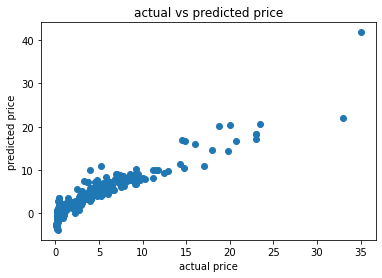

In [15]:
#visualize the actual and predict price
plt.scatter(y_train,trap)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted price")
plt.show()

In [16]:
#prediction on test data
trap1=lin_reg.predict(x_test)

In [17]:
error_score1=metrics.r2_score(y_test,trap1)
print("r squared error:",error_score1)

r squared error: 0.8365766715026905


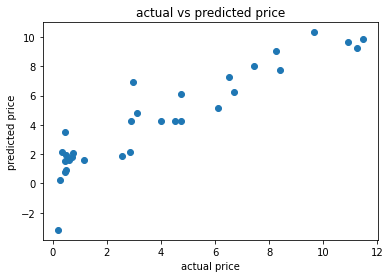

In [18]:
plt.scatter(y_test,trap1)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted price")
plt.show()

In [20]:
import joblib


In [23]:
joblib.dump(lin_reg,'cars.pkl')
# joblib.dump(lin_reg,file)

['cars.pkl']